 # Decision Tree Model

In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
#importing libraries 
import numpy as np #numeric algebra
import pandas as pd #data manupilation
import graphviz #visualisation of the leaf nodes
import seaborn as sns #statistical data visualisation
import matplotlib as plt #plotting and data visualisation

#machine learning libraries(decision tree) 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Control display
pd.options.display.max_columns=50

sns.set(style="darkgrid", rc={'axes.facecolor':'#616E7C'})
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')



In [9]:
#read the data
df=pd.read_csv('heart_disease.csv')
df.head(30)#  shows the fisrt five rows



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [10]:
#number of people with heart disease
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
#percentages of male and female ,those with heart diseases
#female
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])

#show the output 
print('the females are ',count_female)
print('the males are ',count_male)

#show percentage
percentage_female=(count_female/(count_male +count_female))*100
print('the percentage of female is ' ,percentage_female)

percentage_male=(count_male/(count_male +count_female))*100
print('the percentage of male is ' ,percentage_female)


the females are  312
the males are  713
the percentage of female is  30.4390243902439
the percentage of male is  30.4390243902439


In [12]:
#show mean for each  particular column basing on the numbers from the target column
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [13]:
#checking for null of NaN values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#ML train and test data
#create logistic regression
y=df.target.values
x_data=df.drop(['target'],axis=1)#normalising 

#split the data for training 70% and testing 30%
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test=train_test_split(x_data, y ,test_size=0.3,random_state=42)

#check shape of data remaining after splitting for training and testing
x_train.shape ,x_test.shape

((717, 13), (308, 13))

In [15]:
#check the datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [16]:
#check x_train headers
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
227,44,0,2,118,242,0,1,149,0,0.3,1,1,2
910,50,1,2,140,233,0,1,163,0,0.6,1,1,3
362,43,0,2,122,213,0,1,165,0,0.2,1,0,2


In [17]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
#predict the class label for the test data using the decision tree classifier
y_pred_gini=clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy  score with criterion gini index :(0:0.4f)',format(accuracy_score(y_test,y_pred_gini)))

Model accuracy  score with criterion gini index :(0:0.4f) 0.8051948051948052


In [19]:
#predict the class label for training data using decision tree classifier
y_pred_train_gini=clf_gini.predict(x_train)
y_pred_train_gini

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [20]:
#print the training set of accuracy score 
print ('Training-set accuracy score:{0:0.4f}'.format(clf_gini.score(x_train,y_train)))
print ('Training-set accuracy score:{0:0.4f}'.format(clf_gini.score(x_test , y_test)))

Training-set accuracy score:0.8577
Training-set accuracy score:0.8052


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]'),
 Text(0.0625, 0.125, 'gini = 0.339\nsamples = 88\nvalue = [19, 69]'),
 Text(0.1875, 0.125, 'gini = 0.285\nsamples = 64\nvalue = [53, 11]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.043\nsamples = 183\nvalue = [179, 4]'),
 Text(0.75, 0.625, 'x[12] <= 2.5\ngini = 0.347\nsamples = 372\nvalue = [83, 289]'),
 Text(0.625, 0.375, 'x[9] <= 2.1\ngini = 0.225\nsamples = 278\nvalue = [36, 242]'),
 Text(0.5625, 0.125, 'gini = 0.174\nsamples = 260\nvalue = [25, 235]'),
 Text(0.6875, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.875, 0.375, 'x[7] <= 142.5\ngini = 0.5\nsamples = 94\nvalue = [47, 47]

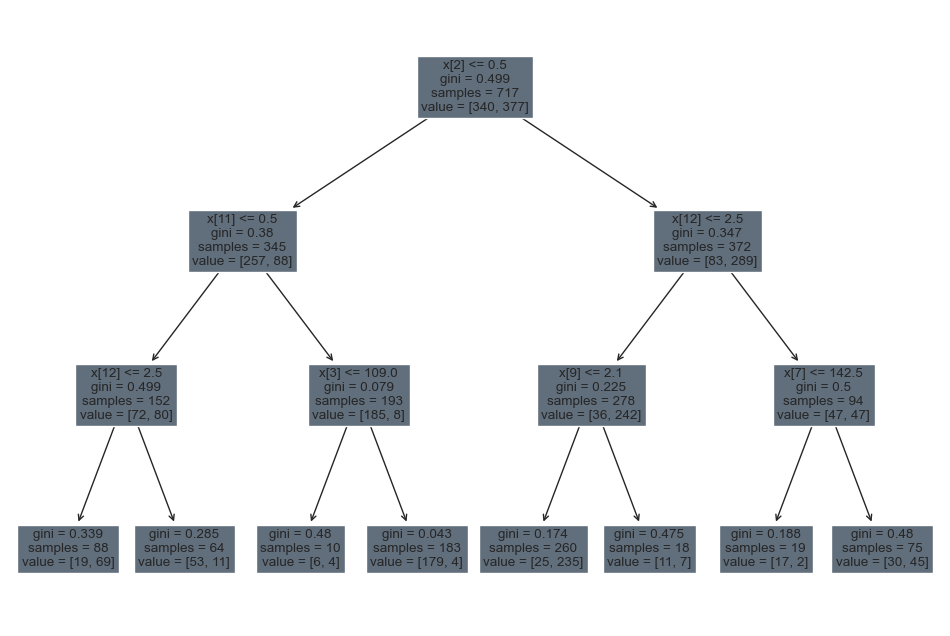

In [21]:
#visualisation of the decision trees create figure for width and height
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [22]:
#normalise data for training and testing
import pandas as pd
heart_data=pd.read_csv('heart_disease.csv')
y_data=heart_data['target'].values
x=heart_data.drop(['target'],axis=1)
#train the dataset
model=tree.DecisionTreeClassifier()
model.fit(x_data,y)
#Get the class name from the dataset
class_names=heart_data['target'].unique().astype(str)

#generate the graphviz visualisation
tree.export_graphviz(model,out_file='heart_disease_new.dot',
                    feature_names=x_data.columns,
                    class_names=class_names,
                    label='all',
                    filled=True,rounded=True)